# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [225]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [226]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [227]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [228]:
reg = smf.ols('tip ~ time + sex + smoker + net_bill', data = tips).fit()

tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.64e-20
Time:                        17:27:23   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# removendo as variaveis insignificantes
reg = smf.ols('tip ~ smoker + net_bill', data = tips).fit()

tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.56e-22
Time:                        17:27:23   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

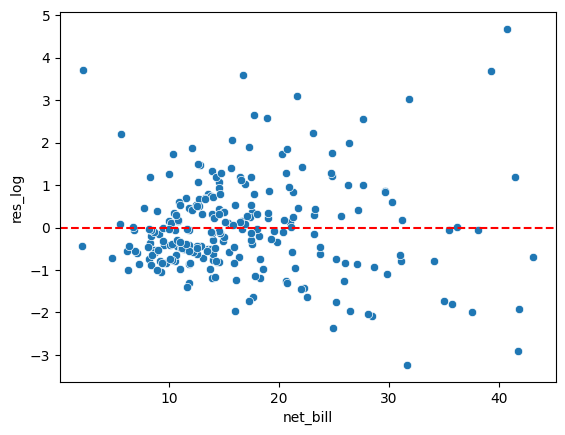

In [230]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [231]:
reg = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()

tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.38e-19
Time:                        17:27:23   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

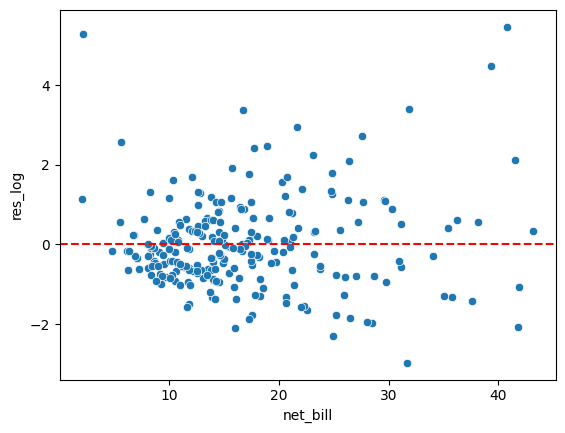

In [232]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [233]:
reg = smf.ols('tip ~ smoker + np.power(net_bill,2)', data = tips).fit()

tips['res_power'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.04e-19
Time:                        17:27:23   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

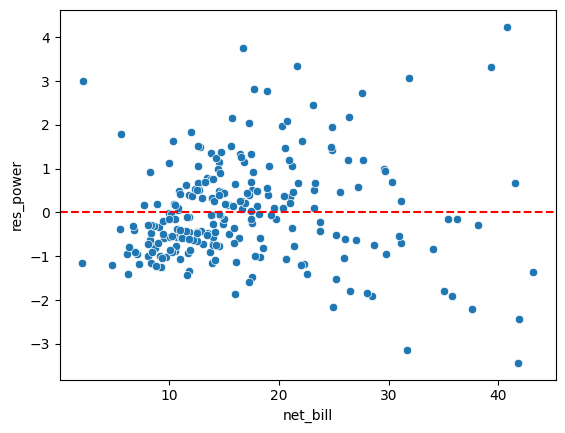

In [234]:
sns.scatterplot(x = 'net_bill', y = 'res_power', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [235]:
reg = smf.ols('np.log(tip) ~ time + sex + smoker + net_bill', data = tips).fit()

tips['res_log_2'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.21e-18
Time:                        17:27:23   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
reg = smf.ols('np.log(tip) ~ smoker + net_bill', data = tips).fit()

tips['res_log_2'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.31e-20
Time:                        17:27:23   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

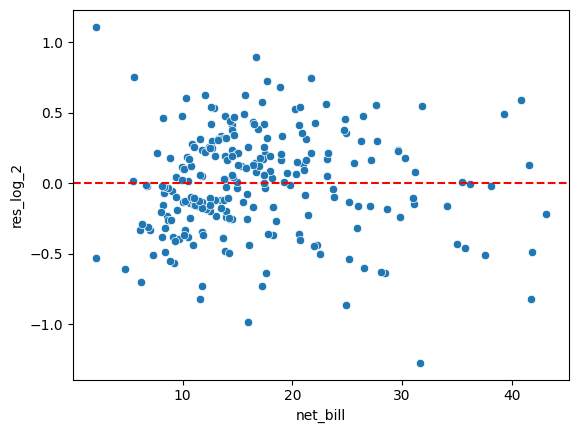

In [237]:
sns.scatterplot(x = 'net_bill', y = 'res_log_2', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [238]:
reg = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()

tips['res_log_2'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.38e-19
Time:                        17:27:23   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
reg = smf.ols('np.log(tip) ~ smoker + np.power(net_bill,2)', data = tips).fit()

tips['res_power_2'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.45e-16
Time:                        17:27:23   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
reg = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.38e-19
Time:                        17:27:23   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445  

In [241]:
reg = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.20e-21
Time:                        17:27:23   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138  

O modelo com log de tip é melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [242]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [243]:
reg = smf.ols('renda ~ tempo_emprego', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:27:24   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

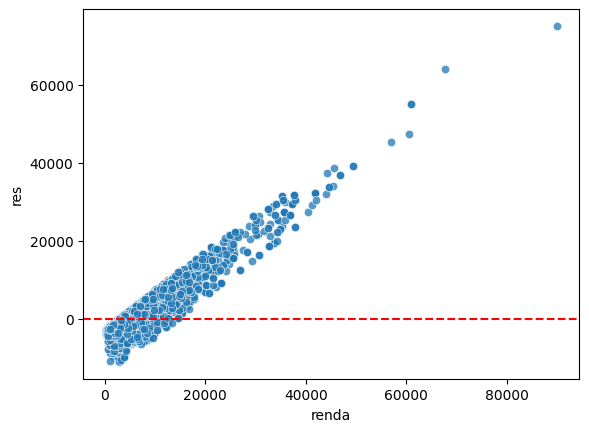

In [244]:
previsao_renda['res'] = reg.resid

sns.scatterplot(x = 'renda', y = 'res', data = previsao_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [252]:
# previsao_renda = previsao_renda.drop(previsao_renda[previsao_renda['tipo_renda'] == 'Bolsista'].index)
reg = smf.ols('renda ~ tempo_emprego:idade + sexo + posse_de_imovel:posse_de_veiculo', data = previsao_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     683.3
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:28:42   Log-Likelihood:            -1.2199e+05
No. Observations:               12462   AIC:                         2.440e+05
Df Residuals:                   12456   BIC:                         2.440e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        1649.4613     97.804     16.865      0.000    1457.751    1841.171
sexo[T.M]                                        2317.2210     86.923     26.658      0.000    2146.839    2487.603
posse_de_veiculo[T.True]                          146.7520    135.926      1.080      0.280    -119.684     413.188
posse_de_imovel[T.True]:posse_de_veiculo[False]   478.4214    106.708      4.483      0.000     269.257     687.586
posse_de_imovel[T.True]:posse_de_veiculo[True]    309.7297    125.273      2.472      0.013      64.176     555.283
tempo_emprego:idade                                 6.0763      0.111     54.578      0.000       5.858       6.295
==============================================================================
Omnibus:                     9952.323   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           402741.043
Skew:                           3.534   Prob(JB):                         0.00
Kurtosis:                      29.938   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

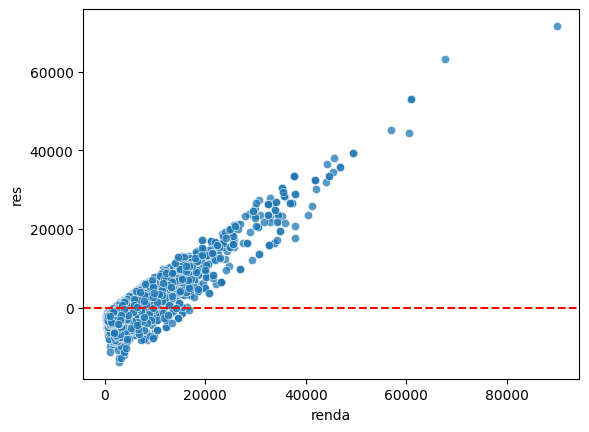

In [253]:
previsao_renda['res'] = reg.resid

sns.scatterplot(x = 'renda', y = 'res', data = previsao_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Houve uma melhoria no gráfico de resíduos pois o residuo seguiu ligiramente a renda